In [111]:
import tensorflow as tf
from tensorflow import keras

In [112]:
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


In [113]:
fm=keras.datasets.fashion_mnist

In [114]:
(train_images,train_labels),(test_images,test_labels) = fm.load_data()

In [115]:
class_names =['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

In [116]:
train_labels[0]

9

In [117]:
train_images[0].shape

(28, 28)

'ankle boot'

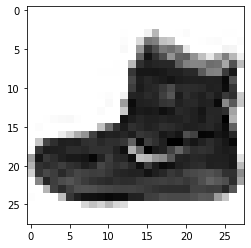

In [118]:
plt.imshow(train_images[0],cmap=plt.cm.binary)
class_names[train_labels[0]]

In [119]:
train_images.shape

(60000, 28, 28)

In [120]:
len(train_labels)

60000

In [121]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [122]:
test_images.shape

(10000, 28, 28)

In [123]:
len(test_labels) 

10000

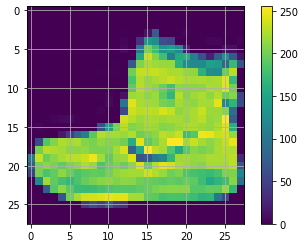

In [124]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid()
plt.show()

In [125]:
train_images=train_images / 255.0
test_images=test_images / 255.0

In [126]:
train_images[0].shape

(28, 28)

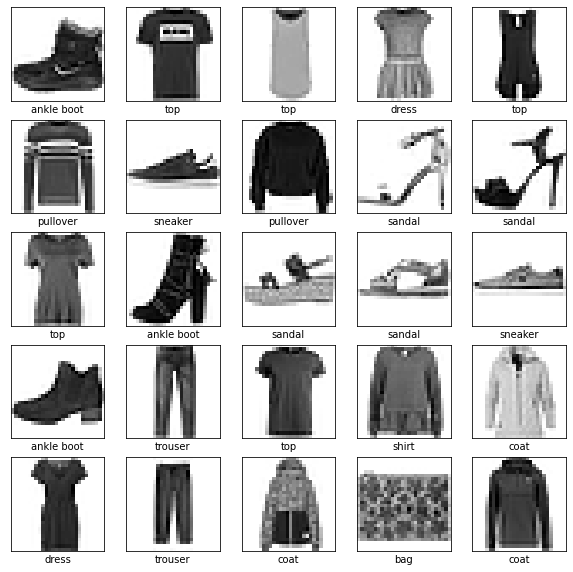

In [127]:
plt.figure(figsize=(10,10))
for i in range(25) :
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  #plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
#plt.show()

In [128]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation=tf.nn.relu),
                        keras.layers.Dense(10,activation=tf.nn.softmax)
])


In [129]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [130]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [131]:

# Train the model
history = model.fit(train_images,train_labels, validation_data=(test_images,test_labels), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4961 - accuracy: 0.8265 - val_loss: 0.4362 - val_accuracy: 0.8475
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3746 - accuracy: 0.8658 - val_loss: 0.3819 - val_accuracy: 0.8626
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3366 - accuracy: 0.8771 - val_loss: 0.3822 - val_accuracy: 0.8615
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3138 - accuracy: 0.8844 - val_loss: 0.3711 - val_accuracy: 0.8653
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2974 - accuracy: 0.8911 - val_loss: 0.3493 - val_accuracy: 0.8760
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2820 - accuracy: 0.8958 - val_loss: 0.3467 - val_accuracy: 0.8775
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2712 - accuracy: 0.8996 - val_loss: 0.3398 - val_accuracy:

In [148]:
score = model.evaluate(test_images,  test_labels, verbose=0)
print("Validation Accuracy = %.2f%%" % (score[1]*100))

score = model.evaluate(train_images,train_labels,verbose=0)
print("\nTraining Accuracy = %.2f%%" % (score[1]*100))

Validation Accuracy = 88.96%

Training Accuracy = 93.83%


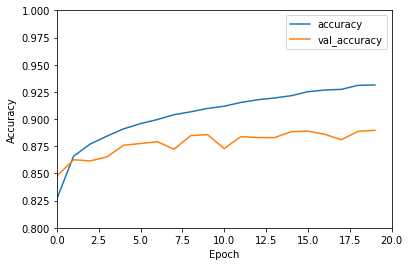

In [142]:
#Evaluate the model

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.xlim([0, 20])
plt.legend(loc='upper right')

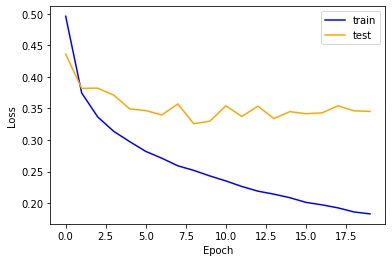

In [155]:
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0.5, 1])
# plt.xlim([1, 25])
plt.legend(loc='upper right')

In [152]:
train_loss , train_acc = model.evaluate(train_images,train_labels)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.1652 - accuracy: 0.9383


In [153]:
test_loss , test_acc = model.evaluate(test_images,test_labels)


313/313 [==============================] - 0s 1ms/step - loss: 0.3453 - accuracy: 0.8896


In [149]:
train_acc

0.9383000135421753

In [136]:
test_acc

0.8895999789237976

In [137]:
p=model.predict(test_images)

In [138]:
p[0]

array([6.7778604e-12, 1.4656398e-11, 4.8541223e-11, 1.3753208e-12,
       6.2325045e-12, 8.4236460e-03, 8.1643634e-08, 2.3045607e-03,
       2.5140778e-10, 9.8927176e-01], dtype=float32)

In [156]:
class_names[test_labels[23]]

'ankle boot'

In [157]:
np.argmax(p[0])

9

In [158]:
print(class_names[np.argmax(p[0])],class_names[test_labels[0]])


ankle boot ankle boot


In [159]:
#Save the model

saved_model = model.save("model_20epoch.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

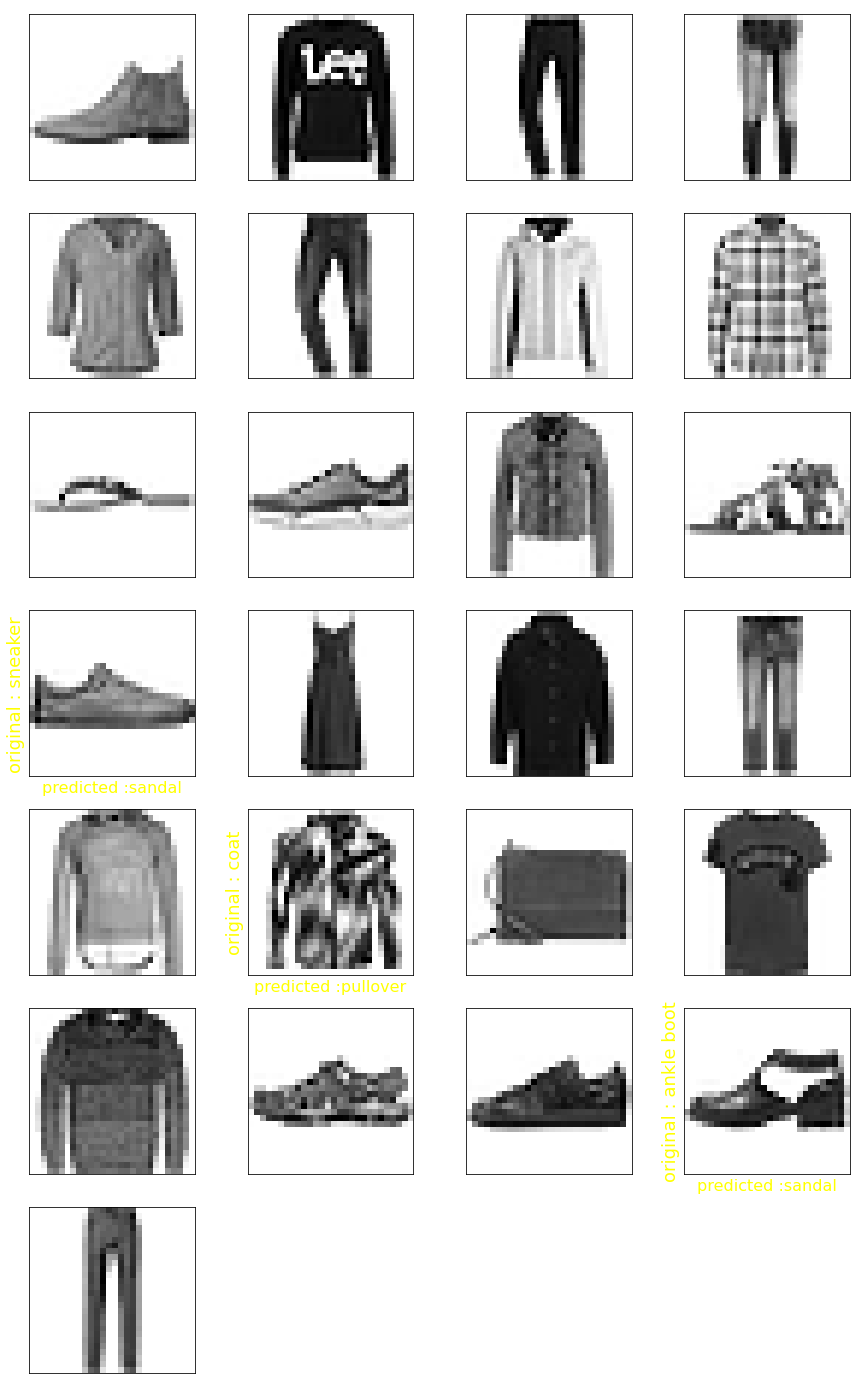

In [163]:
# right means predicted correct and wrong means wrong prediction
# in x axis , predicted class is written 
# in y axis , original class is written
i=0 
plt.figure(figsize=(15,25))
for i in range(25) :
  plt.subplot(7,4,i+1)
  
  plt.xticks([])
  plt.yticks([])
  #plt.grid(False)
  plt.imshow(test_images[i],cmap=plt.cm.binary)
  
  x=np.argmax(p[i])
  if x == test_labels[i] :
   t='white'
  else :
   t='yellow'

  plt.xlabel('predicted :' +class_names[x],fontsize=16,color=t)
  plt.ylabel('original : '+class_names[ test_labels[i]],fontsize=18,color=t)

Text(0, 0.5, 'original : trouser')

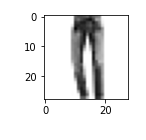

In [178]:
plt.figure(figsize=(1.5,2))
plt.imshow(test_images[144],cmap=plt.cm.binary)
x=np.argmax(p[144])
plt.xlabel('predicted :' +class_names[x],fontsize=12,color=t)
plt.ylabel('original : '+class_names[ test_labels[144]],fontsize=12,color=t)

ValueError: ignored